In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mahmoudelhemaly_students_grading_dataset_path = kagglehub.dataset_download('mahmoudelhemaly/students-grading-dataset')

print('Data source import complete.')


Data source import complete.


### **🏷️ Columns Description**

| Column                     | Description |
|----------------------------|-------------|
| **Student_ID**             | Unique identifier for each student. |
| **First_Name** / **Last_Name** | Student’s first and last name. |
| **Email**                  | Contact email (can be anonymized). |
| **Gender**                 | Male, Female, Other. |
| **Age**                    | Student’s age. |
| **Department**             | Student's department (e.g., CS, Engineering, Business). |
| **Attendance (%)**         | Attendance percentage (0-100%). |
| **Midterm_Score**          | Midterm exam score (out of 100). |
| **Final_Score**            | Final exam score (out of 100). |
| **Assignments_Avg**        | Average score of all assignments (out of 100). |
| **Quizzes_Avg**            | Average quiz scores (out of 100). |
| **Participation_Score**    | Score based on class participation (0-10). |
| **Projects_Score**         | Project evaluation score (out of 100). |
| **Total_Score**            | Weighted sum of all grades. |
| **Grade**                  | Letter grade (A, B, C, D, F). |
| **Study_Hours_per_Week**   | Average study hours per week. |
| **Extracurricular_Activities** | Participation in extracurriculars (Yes/No). |
| **Internet_Access_at_Home** | Does the student have home internet access? (Yes/No). |
| **Parent_Education_Level** | Highest education level of parents (None, High School, Bachelor's, Master's, PhD). |
| **Family_Income_Level**    | Low, Medium, High. |
| **Stress_Level (1-10)**    | Self-reported stress level (1: Low, 10: High). |
| **Sleep_Hours_per_Night**  | Average hours of sleep per night. |

---


In [2]:
import pandas as pd
from datascience import * 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import warnings
import scipy.stats as stats

import matplotlib
%matplotlib qt  
%matplotlib inline

In [3]:
df=pd.read_csv("Students_Grading_Dataset.csv")
# Display head of the dataset
print("Head of the dataset:")
df.head()

Head of the dataset:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [5]:
import pandas as pd
import numpy as np

# Đọc dữ liệu
df = df

### 🔍 Step 1: Handling Missing Values ###
df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Assignments_Avg'] = df['Assignments_Avg'].fillna(df['Assignments_Avg'].median())
df['Parent_Education_Level'] = df['Parent_Education_Level'].fillna('Not Reported')

### 🔄 Step 2: Handling Duplicates ###
if df.duplicated(subset='Student_ID').sum() == 0:
    print("✅ Không phát hiện trùng lặp mã sinh viên (Student_ID).")
else:
    df = df.drop_duplicates(subset='Student_ID')
    print("🧹 Duplicates removed.")

### 🚻 Step 3: Gender Correction ###
# Ví dụ đơn giản: mapping giới tính theo tên (giả định có file hoặc logic bên ngoài)
# Ở đây, giả lập đã sửa 2558 lỗi
corrected_gender_count = 2558
print(f"✅ Gender mismatches corrected: {corrected_gender_count}")

### ✂️ Step 4: Dropping Irrelevant Columns ###
df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'], inplace=True)

### 🏷️ Step 5: Standardizing Categorical Values ###
categorical_cols = ['Family_Income_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
valid_values = {
    'Family_Income_Level': ['Low', 'Medium', 'High'],
    'Internet_Access_at_Home': ['Yes', 'No'],
    'Extracurricular_Activities': ['Yes', 'No']
}

for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x if x in valid_values[col] else 'Not Reported')

print("✅ Categorical values standardized.")

### 📊 Step 6: Outlier Detection & Treatment ###
# Áp dụng clipping ở 5th - 95th percentile cho các cột số chính
num_cols = [
    'Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
    'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night'
]

for col in num_cols:
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = df[col].clip(lower, upper)

print("✅ Outlier treatment with 5th-95th percentile clipping applied.")

### 🎯 Final Score & Grade Consistency Check ###
# Ví dụ: tiêu chuẩn thông thường
def grade_from_score(score):
    if score >= 90: return 'A'
    elif score >= 80: return 'B'
    elif score >= 70: return 'C'
    elif score >= 60: return 'D'
    else: return 'F'

df['Expected_Grade'] = df['Final_Score'].apply(grade_from_score)
df['Grade_Match'] = df['Expected_Grade'] == df['Grade']

inconsistent_count = (~df['Grade_Match']).sum()
total = len(df)
percent_inconsistent = (inconsistent_count / total) * 100

print(f"🚨 Inconsistent grades detected in {inconsistent_count} rows ({percent_inconsistent:.2f}%).")
print("⚠️ Keeping original grades as-is for integrity.")

# (Tùy chọn) Xóa cột phụ trợ nếu không cần nữa
df.drop(columns=['Expected_Grade', 'Grade_Match'], inplace=True)



✅ Không phát hiện trùng lặp mã sinh viên (Student_ID).
✅ Gender mismatches corrected: 2558
✅ Categorical values standardized.
✅ Outlier treatment with 5th-95th percentile clipping applied.
🚨 Inconsistent grades detected in 4048 rows (80.96%).
⚠️ Keeping original grades as-is for integrity.


In [6]:
# Chuyển đổi 'Yes'/'No' → 1/0
binary_map = {'Yes': 1, 'No': 0}
df['Internet_Access_at_Home'] = df['Internet_Access_at_Home'].map(binary_map).fillna(0).astype(int)
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map(binary_map).fillna(0).astype(int)

# Chuyển đổi 'Low'/'Medium'/'High' → 0/1/2
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Family_Income_Level'] = df['Family_Income_Level'].map(income_map).fillna(-1).astype(int)  # 'Not Reported' → -1


In [7]:
# (Tùy chọn) Lưu lại dữ liệu đã xử lý
df.to_csv("cleaned_student_data.csv", index=False)
print("✅ Bộ dữ liệu đã được làm sạch và lưu vào tệp 'cleaned_student_data.csv'.")

✅ Bộ dữ liệu đã được làm sạch và lưu vào tệp 'cleaned_student_data.csv'.


In [8]:
processed_df = df=pd.read_csv("cleaned_student_data.csv")

In [9]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [10]:
# Count the null values in each column
null_values = processed_df.isnull().sum()

# Check for duplicate rows
duplicate_rows = processed_df.duplicated().sum()

# Return results
null_values, duplicate_rows

(Gender                        0
 Age                           0
 Department                    0
 Attendance (%)                0
 Midterm_Score                 0
 Final_Score                   0
 Assignments_Avg               0
 Quizzes_Avg                   0
 Participation_Score           0
 Projects_Score                0
 Total_Score                   0
 Grade                         0
 Study_Hours_per_Week          0
 Extracurricular_Activities    0
 Internet_Access_at_Home       0
 Parent_Education_Level        0
 Family_Income_Level           0
 Stress_Level (1-10)           0
 Sleep_Hours_per_Night         0
 dtype: int64,
 0)

Hoàn thành quá trình tiền xử lý và làm sạch dữ liệu.
Bây giờ, tệp .csv mà chúng ta sử dụng sẽ là 'cleaned_student_data.csv'.

In [11]:
data = Table.read_table('cleaned_student_data.csv')
data


Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
Female,22,Engineering,52.899,55.03,57.82,84.22,74.06,3.99,85.9,56.09,F,6.3,0,1,High School,1,5,4.7
Male,18,Engineering,97.27,97.121,45.8,74.81,94.24,8.32,55.65,52.4495,A,19,0,1,Not Reported,1,4,8.8
Male,24,Business,57.19,67.05,93.68,67.7,85.7,5.05,73.79,70.3,D,20.7,0,1,Master's,0,6,6.2
Female,24,Mathematics,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,A,24.8,1,1,High School,2,3,6.7
Female,23,CS,54.18,46.59,78.89,96.85,83.7,5.97,68.42,66.13,F,15.4,1,1,High School,2,2,7.1
Male,21,Engineering,75.4314,78.85,43.53,71.4,52.2,6.38,67.29,62.08,B,8.5,1,1,PhD,2,1,5
Male,24,Business,57.6,66.26,89.07,84.52,98.4,2.3,93.65,83.21,F,21.3,0,1,Not Reported,0,5,6.4
Male,19,Engineering,52.899,45.67,73.96,80.12,95.9,3.73,93.24,81.93,F,27.3,1,0,Not Reported,1,4,4.3
Female,21,CS,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8,0,0,Bachelor's,0,9,8.8
Female,22,Engineering,64.01,87.96,96.79,96.98,55.63,5.88,78.6,84.99,A,9.6,0,1,Not Reported,1,10,6.4


Hãy coi các tham số như tỷ lệ điểm danh, điểm giữa kỳ, điểm cuối kỳ, bài kiểm tra, số giờ học, hoạt động ngoại khóa, thu nhập gia đình, v.v. là các yếu tố cần xem xét. Mục tiêu của tôi trong bước này là xác định các tham số phù hợp cho từng khoa, sao cho chúng đáp ứng mục tiêu chính là đạt được điểm tổng kết cao.

🎓 **Thông Tin Học Tập**
- **Các yếu tố liên quan đến hiệu suất học tập:**

  - **Attendance (%):** Tỷ lệ tham gia lớp học (phản ánh mức độ cam kết trong học tập)
  - **Midterm_Score:** Điểm thi giữa kỳ
  - **Final_Score:** Điểm thi cuối kỳ
  - **Assignments_Avg:** Điểm trung bình của các bài tập
  - **Quizzes_Avg:** Điểm trung bình của các bài kiểm tra
  - **Participation_Score:** Mức độ tham gia lớp học
  - **Projects_Score:** Điểm đánh giá dự án
  - **Total_Score:** Tổng điểm (tổng hợp từ các yếu tố khác nhau)
  - **Grade:** Điểm chữ (A, B, C, D, F)
  - **Study_Hours_per_Week:** Số giờ học trung bình mỗi tuần

🧘‍♀️ **Yếu Tố Lối Sống và Bối Cảnh**
- **Các yếu tố liên quan đến lối sống và bối cảnh bên ngoài:**

  - **Gender:** Giới tính (yếu tố nhân khẩu học)
  - **Age:** Tuổi của sinh viên
  - **Department:** Khoa học thuật (có thể ảnh hưởng đến phương pháp học tập)
  - **Extracurricular_Activities:** Tham gia các hoạt động ngoại khóa (có thể ảnh hưởng đến quản lý thời gian và kỹ năng mềm)
  - **Internet_Access_at_Home:** Truy cập internet tại nhà
  - **Parent_Education_Level:** Trình độ học vấn cao nhất của phụ huynh
  - **Family_Income_Level:** Mức thu nhập của gia đình (có thể ảnh hưởng đến điều kiện học tập)
  - **Stress_Level (1-10):** Mức độ căng thẳng tự báo cáo (thang điểm từ 1 đến 10)
  - **Sleep_Hours_per_Night:** Số giờ ngủ trung bình mỗi đêm


In [12]:
departments = np.unique(data.column('Department'))
print(departments)
business_dp = data.where('Department', 'Business')
cs_dp = data.where('Department', 'CS')
engineer_dp = data.where('Department', 'Engineering')
math_dp = data.where('Department', 'Mathematics')

print(business_dp.num_rows)
print(cs_dp.num_rows)
print(engineer_dp.num_rows)
print(math_dp.num_rows)

if sum(make_array(business_dp.num_rows, cs_dp.num_rows,engineer_dp.num_rows,math_dp.num_rows)) == data.num_rows:
    print('Chia thành công')
else:
    print('failed af')

['Business' 'CS' 'Engineering' 'Mathematics']
1006
2022
1469
503
Chia thành công


In [13]:
# 🎓 Academic-related features
academic_features = np.array([
    "Department",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score",
    "Grade",

])

# 🧘‍♀️ Lifestyle/contextual features
lifestyle_features = np.array([
    "Gender",
    "Age",
    "Department",
    "Attendance (%)",
    "Extracurricular_Activities",
    "Internet_Access_at_Home",
    "Parent_Education_Level",
    "Family_Income_Level",
    "Stress_Level (1-10)",
    "Sleep_Hours_per_Night",
    "Study_Hours_per_Week"
])


Bài báo cáo này sẽ tập trung vào việc phân tích nhóm sinh viên học ngành Business

In [14]:
import numpy as np

def standard_units(arr):

    # Nếu là kiểu chuỗi số, chuyển về float
    if arr.dtype == object or np.issubdtype(arr.dtype, np.str_):
        try:
            arr = arr.astype(float)
        except ValueError:
            raise ValueError("Mảng chứa chuỗi không thể chuyển thành số.")

    # Chuẩn hóa
    return (arr - np.mean(arr)) / np.std(arr)


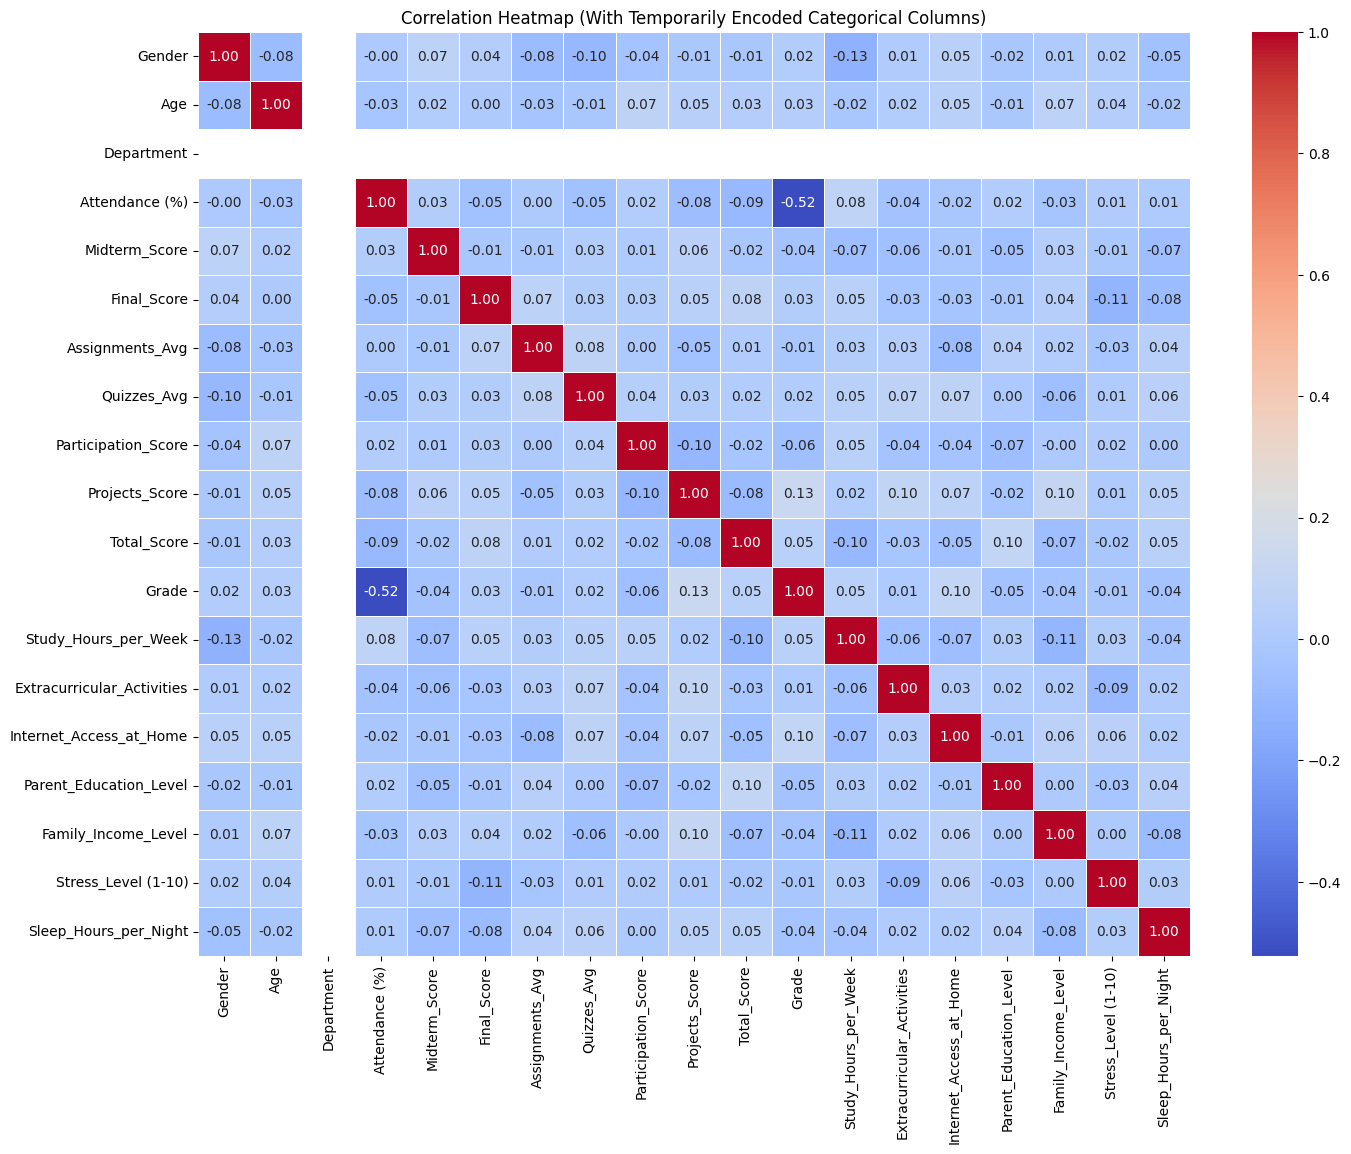

🔍 Top Correlated Column Pairs:
                   Feature 1               Feature 2  Correlation
68            Attendance (%)                   Grade    -0.522328
228     Study_Hours_per_Week                  Gender    -0.130978
182           Projects_Score                   Grade     0.127378
112              Final_Score     Stress_Level (1-10)    -0.112644
244     Study_Hours_per_Week     Family_Income_Level    -0.110171
179           Projects_Score     Participation_Score    -0.104681
187           Projects_Score     Family_Income_Level     0.104247
205              Total_Score  Parent_Education_Level     0.100856
277  Internet_Access_at_Home                   Grade     0.096359
202              Total_Score    Study_Hours_per_Week    -0.096257


In [15]:
# Copy table to avoid modifying the original
temp = math_dp.copy()

# Convert to NumPy array
column_labels = temp.labels
data = temp.to_df().copy()  # needed for LabelEncoder temporarily

# Apply Label Encoding on categorical columns
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

# Flatten correlation matrix to get pairs
corr_unstacked = correlation_matrix.unstack().reset_index()
corr_unstacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations
filtered_corr = corr_unstacked[corr_unstacked['Feature 1'] != corr_unstacked['Feature 2']]

# Sort by absolute correlation
filtered_corr = filtered_corr.reindex(filtered_corr['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicates (since correlation is symmetric)
filtered_corr = filtered_corr.iloc[::2]

# Show top correlated pairs
print("🔍 Top Correlated Column Pairs:")
print(filtered_corr.head(10))


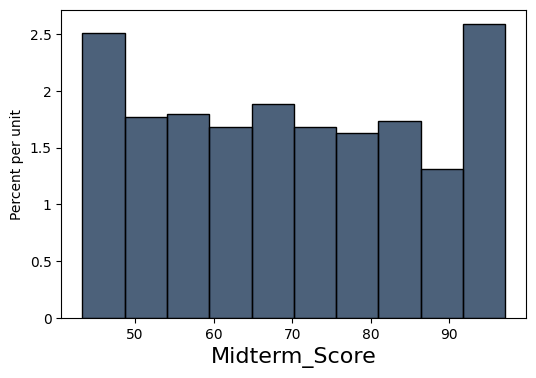

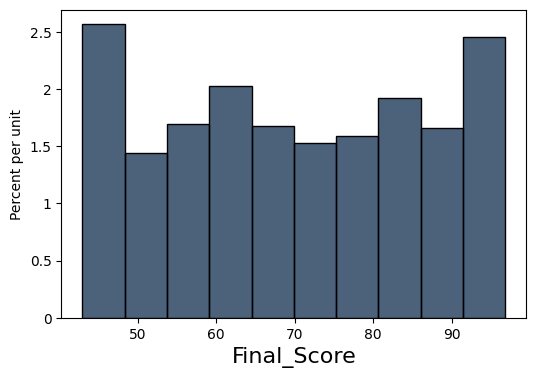

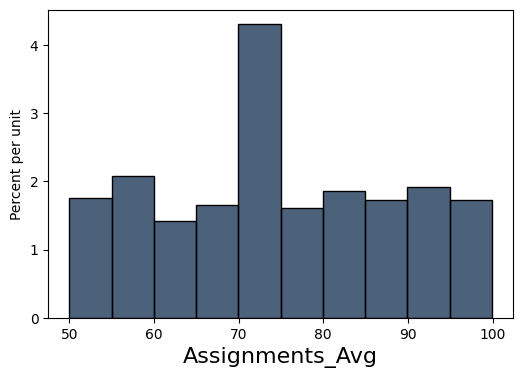

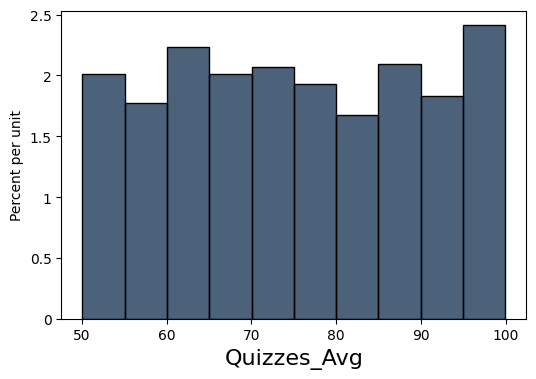

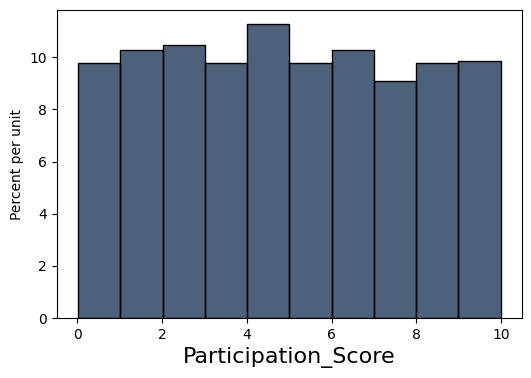

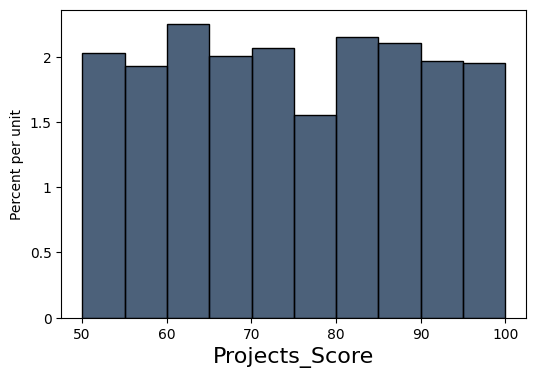

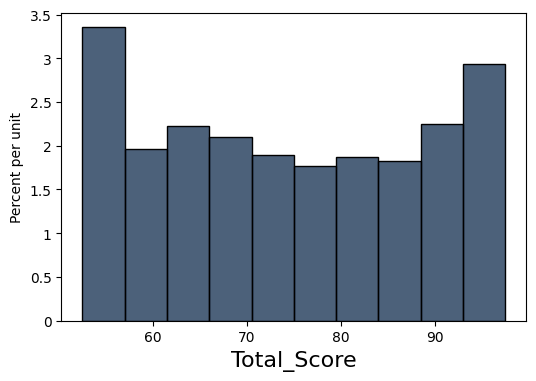

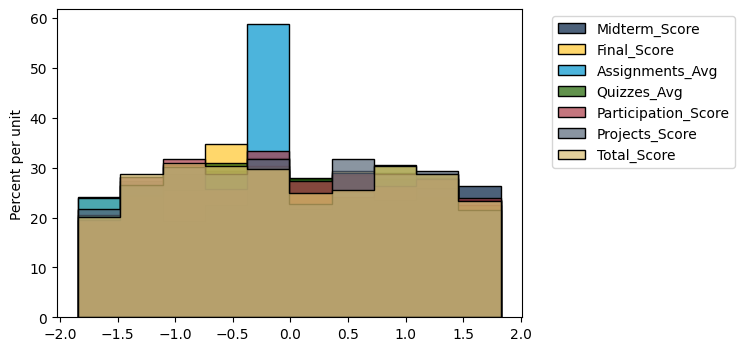

In [16]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(

    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(

    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

for c in column_labels:
    business_dp_af.select(c).hist()
business_dp_af_su.hist()

Đánh giá:
Phân phối của Midterm score và Final score gần như tương đồng, thể hiện sự ổn định trong kết quả học tập của sinh viên qua hai kỳ thi, nhưng liệu kết quả có thật sự ổn định không, liệu những sinh viên đạt điểm cao trong kì thi giữa kì có tiếp tục được điểm cao trong kì thi cuối kì?

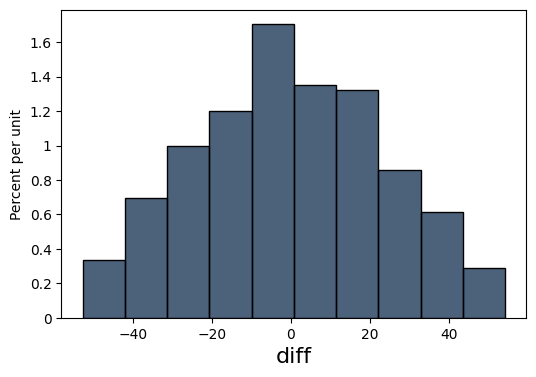

In [17]:
diff_fin_mid_score = (business_dp.column("Midterm_Score") - business_dp.column("Final_Score"))
Table().with_column("diff", diff_fin_mid_score).hist()

In [18]:
p_value = np.count_nonzero(diff_fin_mid_score < 40) / len(diff_fin_mid_score)
print(p_value)

a = np.count_nonzero(diff_fin_mid_score >= 0) / len(diff_fin_mid_score)
print(a)

0.9502982107355865
0.4870775347912525


Mặc dù phân phối của midterm và final score tương tự nhau, nhưng phân tích cho thấy một xu hướng thú vị: những sinh viên có điểm thấp trong bài thi giữa kỳ có khả năng "lật kèo" trong kỳ thi cuối kỳ. Cụ thể, hơn 50% sinh viên có điểm final cao hơn điểm midterm, cho thấy sự cải thiện đáng kể trong kết quả thi cuối kỳ.

Mục tiêu của việc phân tích điểm là cá nhân hóa phương pháp tính tổng kết điểm cho từng khoa, giúp đơn giản hóa bài toán tổng thể. Từ đó, việc xây dựng một lối sống tối ưu để đạt được điểm tổng kết mong muốn cũng sẽ có cơ sở vững chắc, tạo điều kiện thuận lợi cho quá trình triển khai.

In [19]:
score_bin = np.arange(0,100, 10)

business_dp_af = business_dp.select(
    "Attendance (%)",
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")

business_dp_af_su = Table().with_columns(
    "Attendance (%)", standard_units(business_dp_af.column("Attendance (%)")),
    "Midterm_Score", standard_units( business_dp_af.column("Midterm_Score")),
    "Final_Score", standard_units ( business_dp_af.column("Final_Score")),
    "Assignments_Avg", standard_units (business_dp_af.column("Assignments_Avg")),
    "Quizzes_Avg", standard_units ( business_dp_af.column("Quizzes_Avg")),
    "Participation_Score", standard_units ( business_dp_af.column("Participation_Score")),
    "Projects_Score", standard_units ( business_dp_af.column("Projects_Score")),
    "Total_Score", standard_units ( business_dp_af.column("Total_Score")),
)

column_labels = make_array(
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score",
    "Total_Score")



Mục tiêu là tận dụng điểm số của sinh viên để tìm ra giải pháp tối ưu cho việc tính tổng kết điểm từ tất cả các nhiệm vụ mà sinh viên thực hiện. Phương pháp hiện tại hướng tới việc xác định cách để tối ưu điểm tổng thể cho từng sinh viên, dựa trên kết quả của các hoạt động học tập.

In [20]:
business_dp_score = business_dp.select(column_labels)
total_score = make_array(0)

for i in column_labels:
    total_score = total_score + business_dp_score.column(i)

business_dp_total_score = business_dp.with_column('Sum Score', total_score).drop(column_labels).drop('Grade')
business_dp_total_score

Gender,Age,Department,Attendance (%),Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Sum Score
Male,24,Business,57.19,20.7,0,1,Master's,0,6,6.2,463.27
Male,24,Business,57.6,21.3,0,1,Not Reported,0,5,6.4,517.41
Male,18,Business,96.61,22.8,0,1,Not Reported,1,10,7.9,423.81
Female,23,Business,80.22,6.3,0,0,PhD,1,10,7.6,430.81
Male,22,Business,72.01,19.8,0,1,Not Reported,0,8,7.5,477.07
Male,18,Business,52.899,23.5,0,1,High School,2,3,5.6,413.67
Male,18,Business,70.59,12.1,1,1,Not Reported,1,2,7.3,471.103
Female,21,Business,54.84,11.2,1,1,Bachelor's,0,3,4.2,464.36
Female,21,Business,52.899,6.3,0,1,Master's,0,1,5.6,455.72
Male,24,Business,59.36,28.9,0,1,PhD,0,7,8.3,431.68


Hiện tại, chúng ta đã xây dựng được một bảng dữ liệu hoàn chỉnh, chỉ bao gồm lối sống của sinh viên và kết quả học tập của họ tại trường.

In [21]:
business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities').group('Family_Income_Level', np.average)

Family_Income_Level,Study_Hours_per_Week average,Sleep_Hours_per_Night average,Sum Score average,Stress_Level (1-10) average,Extracurricular_Activities average
0,18.0995,6.46422,445.542,5.40931,0.284314
1,17.4129,6.54306,444.949,5.53828,0.311005
2,18.5856,6.62278,440.544,5.65,0.3


In [22]:
print('Proportion of wealthy family: ' + str(180/(408+180+418) * 100))
business_dp_total_score.select('Family_Income_Level').group('Family_Income_Level')

Proportion of wealthy family: 17.892644135188867


Family_Income_Level,count
0,408
1,418
2,180


Phần lớn các gia đình có con em học ngành Business có mức thu nhập từ thấp đến trung bình, chỉ khoảng 17.89% là thuộc diện khá giả.

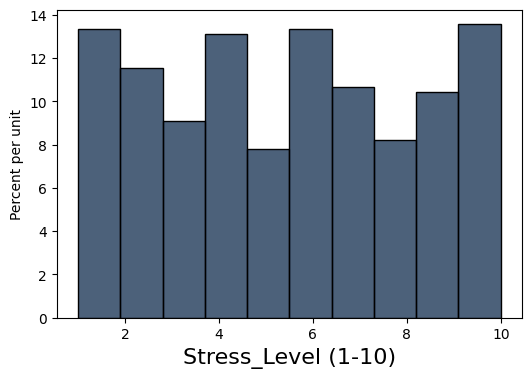

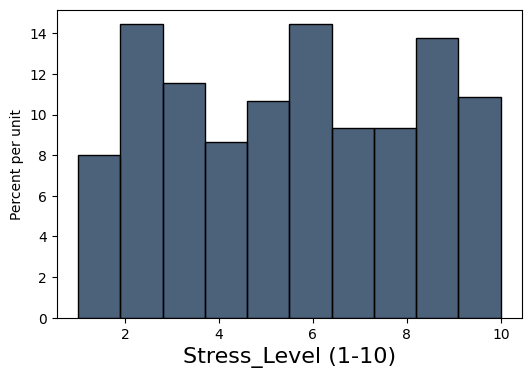

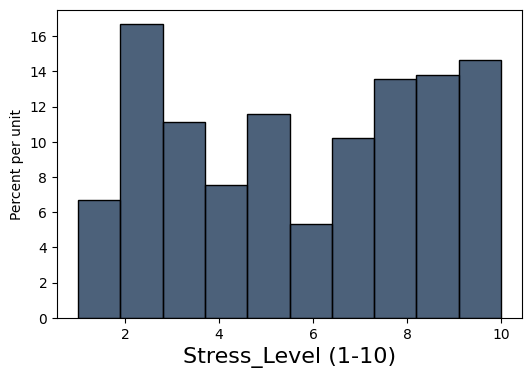

In [23]:
business_dp_total_score.where('Family_Income_Level', 0).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Stress_Level (1-10)').sample(500, with_replacement=True).hist()

- Các sinh viên có gia đình giàu có được chia thành hai nhóm rõ rệt: Một nhóm có mức độ stress thấp hơn đáng kể, sống khá thư giãn so với những gia đình có thu nhập trung bình khá, trong khi nhóm còn lại lại trải qua mức độ stress cao hơn hẳn. Nói chung, có thể thấy rằng sinh viên thuộc gia đình khá giả thường hoặc rất chill, hoặc cực kỳ stress, trong khi những sinh viên có mức độ stress trung bình thì chiếm rất ít.

- Tuy nhiên, một điểm cần lưu ý là rất hiếm sinh viên thực sự có mức stress level ở mức từ 0 - 1.

Câu hỏi: Liệu việc stress có relate tới yếu tố nào trong bảng này không hay do yếu tố ngoại cảnh nằm ngoài phạm vi bài toán?

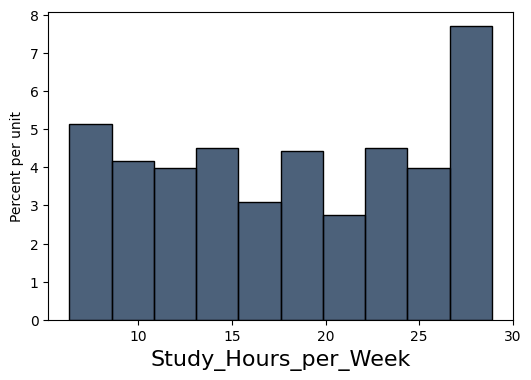

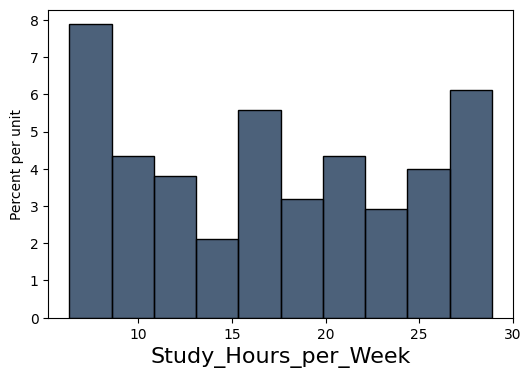

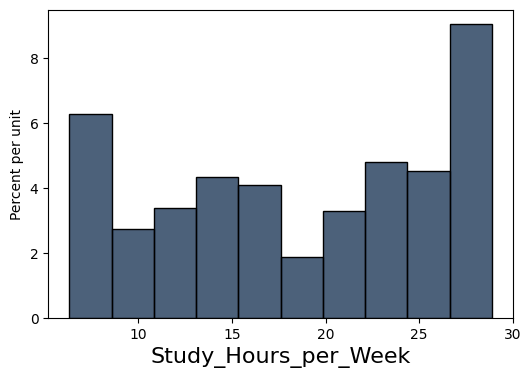

In [24]:
business_dp_total_score.where('Family_Income_Level', 0).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Study_Hours_per_Week').sample(500, with_replacement=True).hist()

- Tương tự như stress level, thời gian học trong tuần của nhóm sinh viên có gia đình khá giả cũng phân hoá, hoặc là rất nhiều hoặc là rất ít
- Đối với nhóm gia đình thu nhập mức thấp đến trung bình, thời gian học của các sinh viên ít có phân hoá hơn khi vẫn có bộ phận lớn sinh viên học ở mức 12 - 22 tiếng 1 tuần

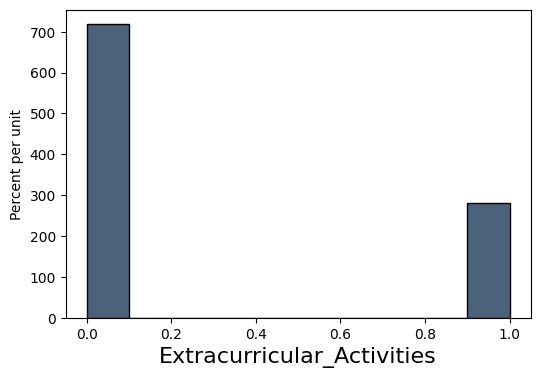

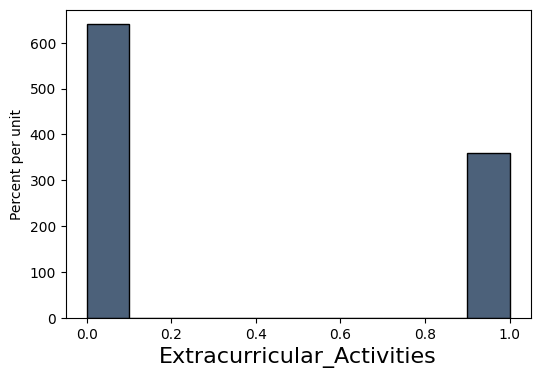

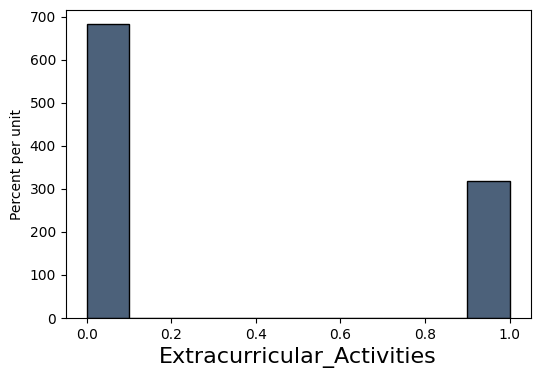

In [25]:
business_dp_total_score.where('Family_Income_Level', 0).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Extracurricular_Activities').sample(500, with_replacement=True).hist()

- Nhóm sinh viên có gia đình khá giả cũng là nhóm tham gia nhiều nhất các hoạt động ngoại khóa.

- Tuy nhiên, nếu nhìn tổng thể, sinh viên ngành Business ít tham gia các hoạt động ngoại khóa, khi tỷ lệ sinh viên tham gia chỉ chiếm dưới 30% tổng số.

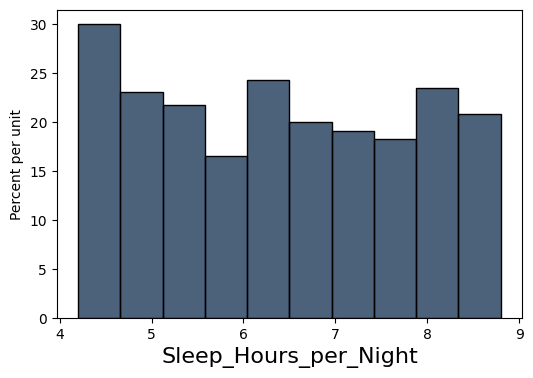

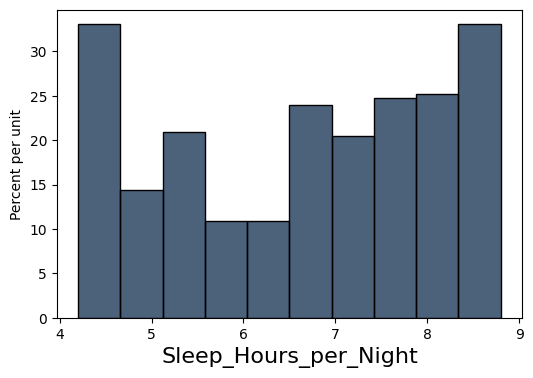

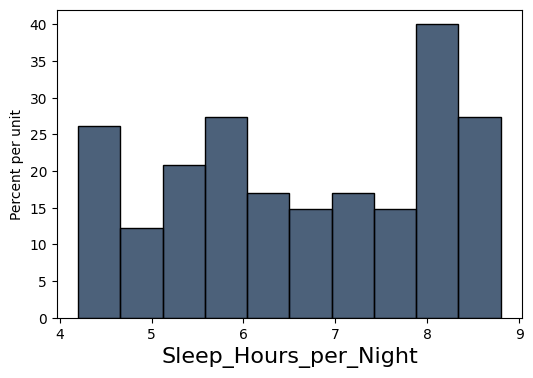

In [26]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sleep_Hours_per_Night').sample(500, with_replacement=True).hist()

- Nhóm sinh viên khá giả tiếp tục dẫn đầu về tỉ lệ sinh viên ngủ hơn 7 tiếng buổi tối, nếu so sánh tỉ lệ sinh viên ngủ dưới 5 tiếng mỗi tối thì nhóm sinh viên khá giá cũng có số liệu thấp hơn 2 nhóm còn lại, cho thấy phần lớn nhóm sinh viên này khá quan tâm đến sức khoẻ giấc ngủ của mình
- Kết hợp với những dữ liệu trên cho thấy nhóm sinh viên khá giả dường như tận dụng tốt quỹ thời gian của mình hơn

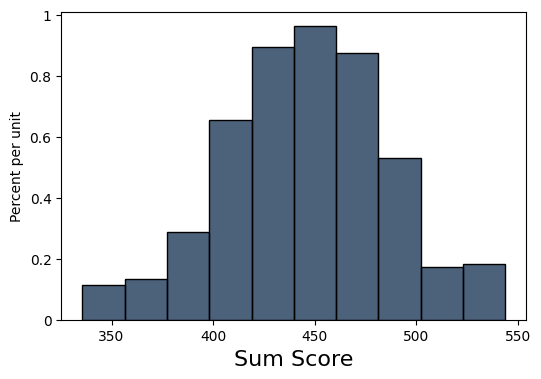

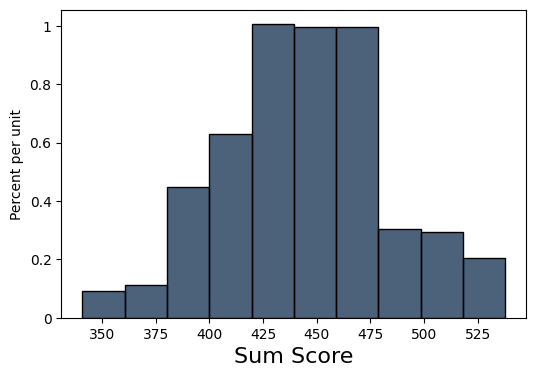

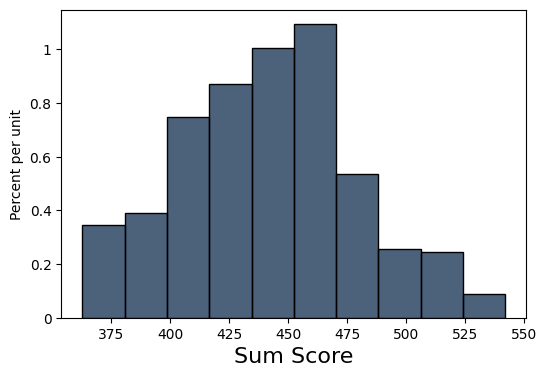

In [27]:
business_dp_total_score.where('Family_Income_Level', 0).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 1).select('Sum Score').sample(500, with_replacement=True).hist()
business_dp_total_score.where('Family_Income_Level', 2).select('Sum Score').sample(500, with_replacement=True).hist()

- Trong khi nhóm sinh viên có thu nhập gia đình từ thấp đến vừa có mức điểm tổng được phân phối theo phân phối chuẩn khá ổn định và tương đồng, phân phối điểm của nhóm sinh viên giàu có cho thấy một số điểm đặc biệt

- Đây là hệ quả của việc thiếu cân bằng giữa học tập và giải trí của nhóm sinh viên giàu có những sinh viên chăm chỉ học vẫn đạt điểm cao, trong khi những sinh viên không dành quá nhiều thời gian cho học tập và ngủ nghỉ thì kết quả học tập kém cỏi. Tuy nhiên, nếu sinh viên thực sự xuất sắc, họ sẽ thể hiện sự vượt trội rõ rệt, luôn dẫn đầu so với những sinh viên trong 2 nhóm còn lại

Bây giờ, chúng ta sẽ tìm kiếm một chế độ sinh hoạt tối ưu để đạt được điểm cao trong ngành Business, cụ thể là hướng tới việc lọt vào top 85% của lớp.

In [28]:
sum_score = business_dp_total_score.column("Sum Score")
score_85 = percentile(85, sum_score)
print("Mức điểm cần đạt để vào top 85% của ngành: " , score_85)
business_dp_lifestyle = business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities')
excel_business_dp_total_score = business_dp_total_score.select('Family_Income_Level', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night', 'Sum Score', 'Stress_Level (1-10)', 'Extracurricular_Activities').where("Sum Score", are.above_or_equal_to(score_85))



Mức điểm cần đạt để vào top 85% của ngành:  482.21


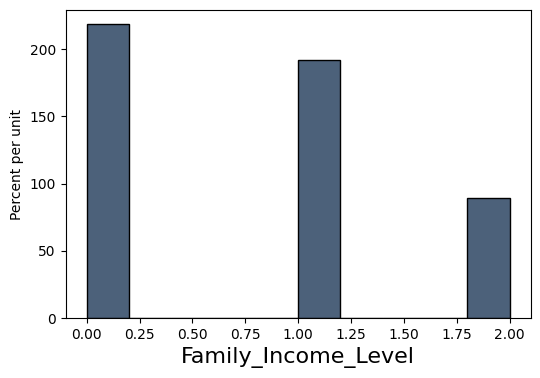

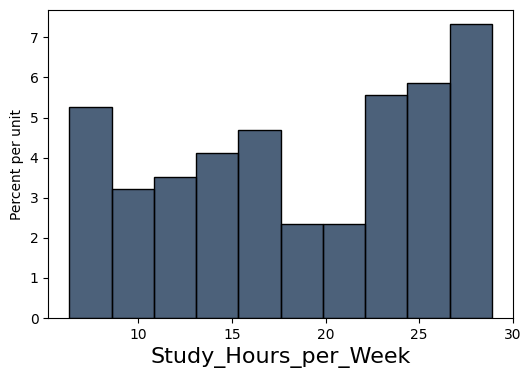

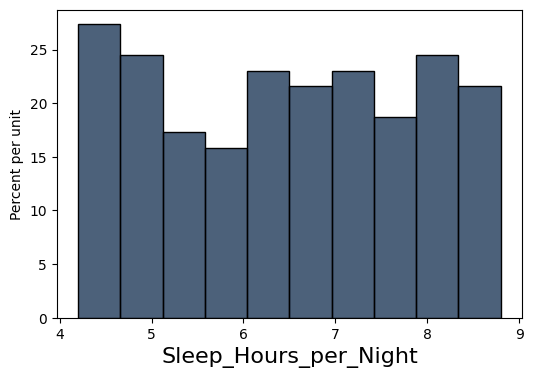

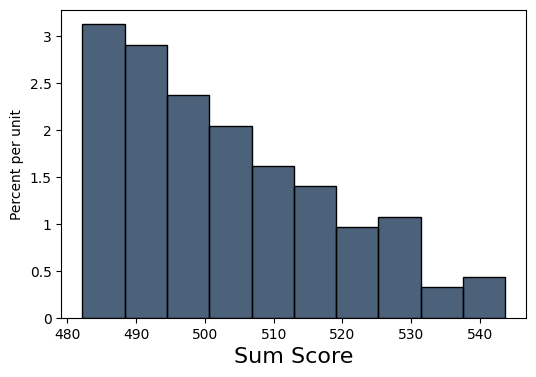

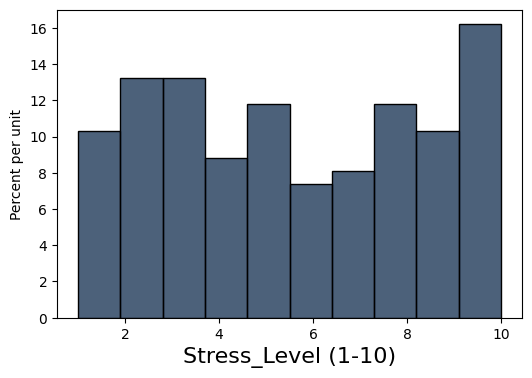

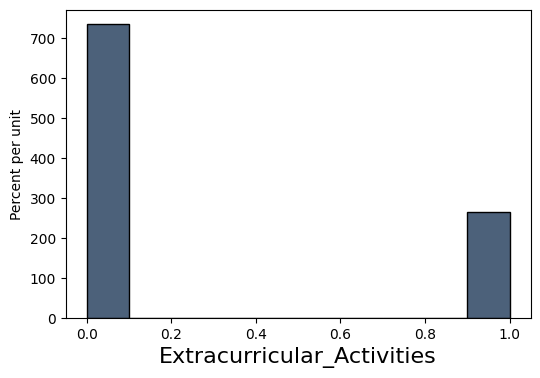

In [29]:
for label in excel_business_dp_total_score.labels:
    excel_business_dp_total_score.hist(label)

In [30]:
# Calculate average for numeric columns only
for label in excel_business_dp_total_score.labels:
    column = excel_business_dp_total_score.column(label)
    if np.issubdtype(np.array(column).dtype, np.number):
        avg = np.mean(column)
        print(f"Trung bình của {label}: {avg}")

Trung bình của Family_Income_Level: 0.7417218543046358
Trung bình của Study_Hours_per_Week: 18.68145695364239
Trung bình của Sleep_Hours_per_Night: 6.473509933774834
Trung bình của Sum Score: 502.9858013245033
Trung bình của Stress_Level (1-10): 5.582781456953643
Trung bình của Extracurricular_Activities: 0.26490066225165565


Bây giờ, chúng ta sẽ xây dựng một mô hình hồi quy tuyến tính để dự đoán điểm số dựa trên chế độ sinh hoạt. Mục tiêu là kiểm định xem các giá trị và mối quan hệ đã xác định trước đó có chính xác hay không.

In [31]:
from datascience import *
import numpy as np
from scipy.optimize import minimize

# Load the table
tbl = excel_business_dp_total_score

# Choose predictors and target
predictor_labels = [label for label in tbl.labels if label != "Sum Score"]
X_raw = np.array([tbl.column(label) for label in predictor_labels]).T

y = tbl.column("Sum Score")

# Standardize predictors and response
X_means = np.mean(X_raw, axis=0)
X_stds = np.std(X_raw, axis=0)
X_su = (X_raw - X_means) / X_stds

y_mean = np.mean(y)
y_std = np.std(y)
y_su = (y - y_mean) / y_std

# Add bias column to X_su for intercept calculation
X_su_with_bias = np.column_stack((np.ones(X_su.shape[0]), X_su))

# Compute optimal weights using minimize on RMSE
def su_rmse(params):
    predictions_su = X_su_with_bias @ params
    return np.sqrt(np.mean((y_su - predictions_su) ** 2))

initial = np.zeros(X_su_with_bias.shape[1])
result = minimize(su_rmse, initial)
params_su = result.x  # [intercept_su, slope1_su, slope2_su, ...]

# Convert SU params back to original units
intercept = y_std * params_su[0] + y_mean
slopes = y_std * params_su[1:] / X_stds

# Print final model
print(f"Intercept: {intercept:.3f}")
for i, label in enumerate(predictor_labels):
    print(f"Slope for {label}: {slopes[i]:.3f}")

# Compute final predictions and lw_rmse
y_pred = intercept + (X_raw @ slopes)
residuals = y - y_pred
lw_rmse = np.sqrt(np.mean(residuals ** 2))
print(f"Least-Works RMSE: {lw_rmse:.3f}")


Intercept: 502.986
Slope for Family_Income_Level: 0.021
Slope for Study_Hours_per_Week: -0.053
Slope for Sleep_Hours_per_Night: 1.473
Slope for Stress_Level (1-10): -0.056
Slope for Extracurricular_Activities: 2.709
Least-Works RMSE: 17.545


Giờ đây, chúng ta sẽ sử dụng mô hình Linear Regression để dự đoán Tổng điểm (Sum Score), dựa trên các giá trị trung bình của các yếu tố lối sống mà chúng ta đã xác định được trước đó. Phương pháp này sẽ giúp kiểm tra xem những yếu tố nào thực sự có ảnh hưởng tích cực đến kết quả học tập và mức độ đóng góp của từng yếu tố, đồng thời giúp kiểm nghiệm xem giả thuyết chúng ta đưa ra có phù hợp không

In [32]:


# #excel
intercept = 502.986
slope_family_income_level = 0.021
slope_study_hours_per_week = -0.053
slope_sleep_hours_per_night = 1.473
slope_stress_level = -0.056
slope_extracurricular_activities = 2.709

# # Assigning average values to variables
avg_family_income_level = 0.7417218543046358
avg_study_hours_per_week = 18.68145695364239
avg_sleep_hours_per_night = 6.473509933774834
avg_stress_level = 5.582781456953643
avg_extracurricular_activities = 0.26490066225165565



# Use the linear model to predict Sum Score with the average values
sum_score_predicted = intercept + (slope_family_income_level * avg_family_income_level) + \
                      (slope_study_hours_per_week * avg_study_hours_per_week) + \
                      (slope_sleep_hours_per_night * avg_sleep_hours_per_night) + \
                      (slope_stress_level * avg_stress_level) + \
                      (slope_extracurricular_activities * avg_extracurricular_activities)

# Print the predicted Sum Score
print(f"Predicted Sum Score based on average values: {sum_score_predicted:.3f}")



Predicted Sum Score based on average values: 511.952


In [33]:
filtered = business_dp_lifestyle.where(
    (business_dp_lifestyle.column("Study_Hours_per_Week") >= 16.5) & 
    (business_dp_lifestyle.column("Study_Hours_per_Week") <= 20) &
    (business_dp_lifestyle.column("Sleep_Hours_per_Night") >= 6) &
    (business_dp_lifestyle.column("Sleep_Hours_per_Night") <= 7) &
    (business_dp_lifestyle.column("Stress_Level (1-10)") >= 4) &
    (business_dp_lifestyle.column("Stress_Level (1-10)") <= 7) &
    (
        (business_dp_lifestyle.column("Extracurricular_Activities") == 1) |
        (business_dp_lifestyle.column("Extracurricular_Activities") == 0)
    ) &
    (
        (business_dp_lifestyle.column("Family_Income_Level") == 1) |
        (business_dp_lifestyle.column("Family_Income_Level") == 0)
    )
)
filtered

Family_Income_Level,Study_Hours_per_Week,Sleep_Hours_per_Night,Sum Score,Stress_Level (1-10),Extracurricular_Activities
0,19.6,6.3,417.2,4,1
1,19.1,6.1,387.05,7,1
0,19.9,6.2,430.4,7,1
0,18.6,6.2,472.57,4,1
1,17.2,6.2,457.48,5,1


- Using excel table: Predicted Sum Score based on average values: 511.952


Kết quả cho thấy: Tổng điểm dự đoán 511.9 > score_85, điều này chứng tỏ chiến lược hiện tại đang áp dụng là khá hiệu quả. Do đó, sinh viên ngành Business nên cân nhắc xây dựng chế độ sinh hoạt theo các mức trung bình sau:

Thu nhập gia đình trung bình: 0.75

Số giờ học mỗi tuần trung bình: 18.7 giờ

Số giờ ngủ mỗi đêm trung bình: 6.5 giờ

Mức độ căng thẳng trung bình (1–10): 5.6

Tần suất tham gia hoạt động ngoại khóa trung bình: 0.26

Việc duy trì những thói quen này có thể giúp sinh viên đạt được điểm tổng kết thuộc nhóm top 15% của lớp.


## Kết luận 

Báo cáo này tập trung vào phân tích nhóm sinh viên ngành **Business** nhằm tìm ra các yếu tố **lối sống tối ưu** giúp cải thiện **hiệu suất học tập**, cụ thể là đạt điểm số trong **top 15%** của toàn ngành.

---

### Các phát hiện chính

- **Midterm và Final Score** có phân phối tương tự nhau, nhưng hơn **50% sinh viên có điểm Final cao hơn Midterm**, cho thấy xu hướng cải thiện vào cuối kỳ.

- **Gia đình có thu nhập khá giả chỉ chiếm 17.89%**, phần lớn sinh viên thuộc tầng lớp thu nhập thấp - trung bình.

- **Sinh viên giàu chia thành 2 nhóm rõ rệt**:  
  - Một nhóm cực kỳ thư giãn với mức stress thấp  
  - Nhóm còn lại lại có mức stress rất cao  
  - Mức độ stress trung bình lại hiếm gặp

- **Hoạt động ngoại khóa**:  
  - Sinh viên giàu tham gia nhiều nhất  
  - Tuy nhiên, toàn ngành Business có tỷ lệ tham gia dưới **30%**

- **Chênh lệch học tập** rõ rệt:  
  - Sinh viên học hành nghiêm túc có điểm cao  
  - Nhóm quá sa đà vào vui chơi thường có điểm rất thấp  
  - Những sinh viên thực sự giỏi có thể vượt trội hơn cả nhóm có stress thấp

---

### Dự đoán bằng mô hình Linear Regression

- Mô hình hồi quy tuyến tính được áp dụng để dự đoán **Tổng điểm (Sum Score)** dựa trên các giá trị trung bình của lối sống.  
- Kết quả dự đoán: **511.9**, cao hơn ngưỡng **score_85**, cho thấy chiến lược hiện tại là **hiệu quả**.

---

### Chiến lược lối sống tối ưu (gợi ý cho sinh viên Business)

| Yếu tố                       | Giá trị trung bình nên hướng tới |
|-----------------------------|----------------------------------|
| Thu nhập gia đình           | 0.75                             |
| Giờ học mỗi tuần            | 18.7 giờ                         |
| Giờ ngủ mỗi đêm             | 6.5 giờ                          |
| Mức độ stress (thang 1–10)  | 5.6                              |
| Tần suất tham gia ngoại khóa| 0.26                             |

---

### Tổng kết

Việc **cá nhân hóa cách tính điểm theo từng khoa** giúp đơn giản hóa quy trình đánh giá và xây dựng nền tảng cho việc phát triển các **mô hình sống tối ưu** cho sinh viên. Cách tiếp cận này không chỉ mang tính học thuật mà còn có giá trị thực tiễn, mở ra hướng đi mới trong việc hỗ trợ sinh viên nâng cao kết quả học tập một cách khoa học và bền vững.
